<a href="https://colab.research.google.com/github/mkthiyagu02/GRIP-INTERNSHIP/blob/main/GRIP_TASK_5_SPORTS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION - GRIP - Data Science and Business Analytics -       JULY 2022

# Name : **THIYAGARAJAN K**
# Task #5 : **Exploratory Data Analysis - Sports**(Indian Premier League)
<hr style="border:2px solid gray">

### **Aim**:
  > ## To perform 'Exploratory Data Analysis" on the dataset "Indian Premier League"
<hr style="border:2px solid gray">

## About Dataset
   >### Both the matches.csv and deliveries.csv datasets only have data between 2008 and 2019. So this data analysis may not applicable to 2022.

#**Dataset** : matches.csv (https://bit.ly/34SRn3b)

## Importing the required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# Visualizing the Dataset

In [7]:
! gdown 18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw # To load dataset from google drive to execute in  Google Colab
!unzip "Indian Premier League.zip" # unzip it 
match_ds = pd.read_csv("matches.csv")
delivery_ds = pd.read_csv("deliveries.csv")

Downloading...
From: https://drive.google.com/uc?id=18iDDIIZGt8eWxzqbyMIqcn5X7bHINuLw
To: /content/Indian Premier League.zip
100% 1.26M/1.26M [00:00<00:00, 132MB/s]
Archive:  Indian Premier League.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [8]:
match_ds.shape

(756, 18)

In [9]:
match_ds.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
match_ds.isnull() #checking for empty values
# ignore the last column 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
match_ds["season"].unique() # Returns unique values in particular column

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [12]:
match_ds["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
# 'Rising Pune Supergiant' and 'Rising Pune Supergiants' are same team with small splelling corrrection,
#'Delhi Daredevils' was rename as 'Delhi Capitals' in 2018
# Replace these two instances with one single value in all four columns
match_ds.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
match_ds.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
match_ds.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
match_ds.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)

In [14]:
match_ds.team1.unique() #rename happened

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [15]:
delivery_ds.shape # shape of delivery dataset

(179078, 21)

In [16]:
delivery_ds.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
delivery_ds.isnull()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
179075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


## **Analyzing the Data**

## Total number of matches played in each season

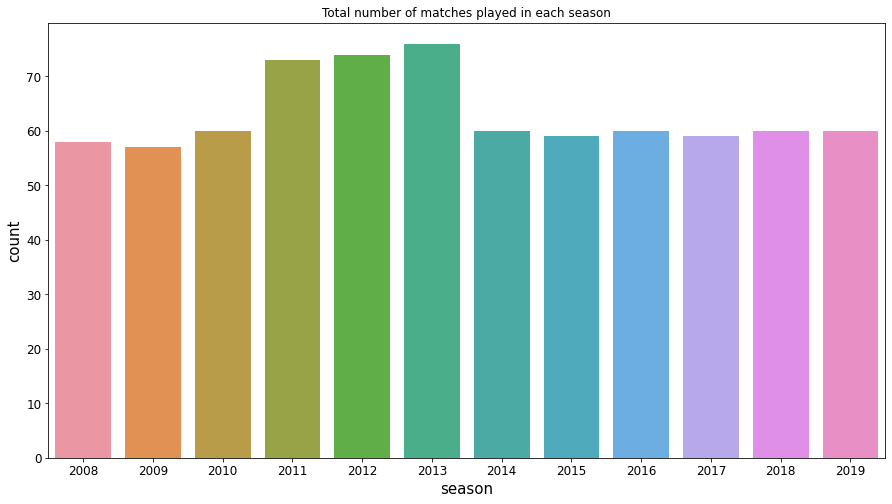

In [18]:
plt.figure(figsize=(15,8))
plt.title("Total number of matches played in each season")
plt.xlabel('Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x=match_ds['season'])# ploting Total number of matches played in each season

## Most Successfull Team in IPL(2008 - 2019)

In [19]:
matches_won = match_ds.groupby("winner")[["id"]].count() #grouping each team with no. of winning matches
matches_won = matches_won.sort_values(by=["id"],ascending=False).reset_index() # arrange in descending order
matches_won.rename(columns = {'id':'No.of matches Won','winner':'Team'},inplace=True) #renameing the columns
matches_won # displaying ipl teams with No. of matches won

,Team,No.of matches Won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


 >## MUMBAI INDIANS won the most matches in the IPL, followed by CHENNAI SUPER KINGS and KOLKATA KNIGHT RIDERS.

### Calculating the Winning Rate

<BarContainer object of 13 artists>

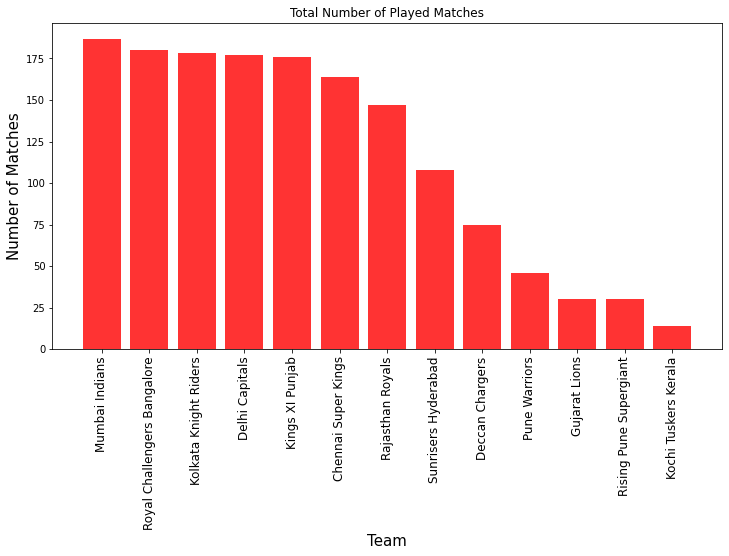

In [20]:
plt.figure(figsize=(12,6))
plt.title("Total Number of Played Matches")
plt.xlabel("Team",fontsize=15)
plt.ylabel("Number of Matches",fontsize=15)
a = match_ds.groupby(["team1"])['team2'].count() #getting no. of match played by each team as team1
b = match_ds.groupby(['team2'])['team1'].count() #getting no. of match played by each team as team2
matches_played = pd.DataFrame(a+b) # adding both dataframe to get toal no. of matches played by each team as both team1 and team2
matches_played["Team"] = matches_played.index #assinging team names in new column "Team"
matches_played.rename(columns={0:'No. of Matches played'},inplace=True)
plt.xticks(rotation = 90,fontsize=12) #displaying the xticks value in vertical algin
plt.yticks(fontsize=10)
matches_played = matches_played.sort_values('No. of Matches played',ascending=False)
plt.bar(matches_played['Team'],matches_played['No. of Matches played'],alpha = 0.8,color='r')  # alpha -> transperancy levels of bar

In [21]:
mergerd_df = matches_played.merge(matches_won,on='Team') # merging two dataframe based on "Team" -> team name 
mergerd_df['Win_Rate'] = (mergerd_df['No.of matches Won']/mergerd_df['No. of Matches played'])*100 # calculating winning rate 
mergerd_df.sort_values(by='Win_Rate',ascending=False)

,No. of Matches played,Team,No.of matches Won,Win_Rate
5,164,Chennai Super Kings,100,60.975610
0,187,Mumbai Indians,109,58.288770
7,108,Sunrisers Hyderabad,58,53.703704
2,178,Kolkata Knight Riders,92,51.685393
6,147,Rajasthan Royals,75,51.020408
11,30,Rising Pune Supergiant,15,50.000000
1,180,Royal Challengers Bangalore,84,46.666667
4,176,Kings XI Punjab,82,46.590909
3,177,Delhi Capitals,77,43.502825
10,30,Gujarat Lions,13,43.333333


### According to the above table, CHENNAI SUPER KINGS has the highest winning rate, followed by MUMBAI INDIANS.

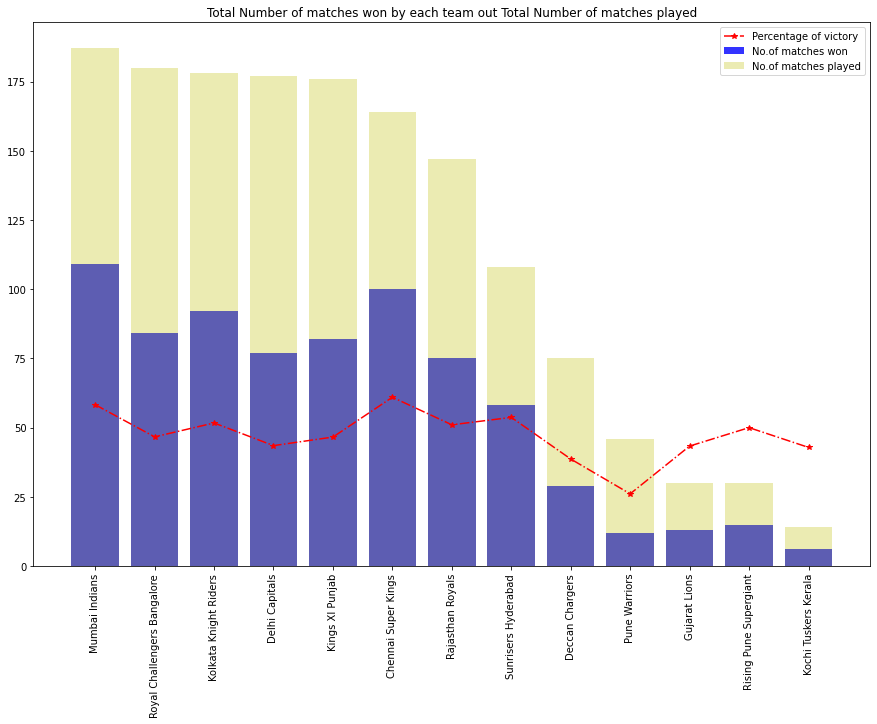

In [22]:
plt.figure(figsize=(15,10))
plt.title("Total Number of matches won by each team out Total Number of matches played")
plt.xticks(rotation=90,fontsize=10)
plt.bar(mergerd_df['Team'],mergerd_df['No.of matches Won'],color='blue',alpha=.8)
plt.bar(mergerd_df['Team'],mergerd_df['No. of Matches played'],color='y',alpha=0.3)
plt.plot(mergerd_df['Win_Rate'],'r-.*')
plt.legend(['Percentage of victory','No.of matches won','No.of matches played'])

## Considering both bar charts, 
## Chennai Super Kings and  MUMBAI INDIANS are the two most successful teams in IPL history (2008 - 2019)
<hr style="border:2px solid gray">

## Most Successful Players in IPL(2008 - 2019)

### Analyzing <b>Man of the Match</b> players

In [23]:
man_of_the_match = match_ds.groupby('player_of_match')[['id']].count() #getting the list of 'man of the match' players
man_of_the_match = man_of_the_match.sort_values(by='id',ascending=False).reset_index().head(15)# arranging it in descending order and filter out top 15 players
man_of_the_match.rename(columns ={ 'player_of_match':'Top Players','id':'The number of times a player has been chosen as the man of the match'},inplace=True)
man_of_the_match

,Top Players,The number of times a player has been chosen as the man of the match
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


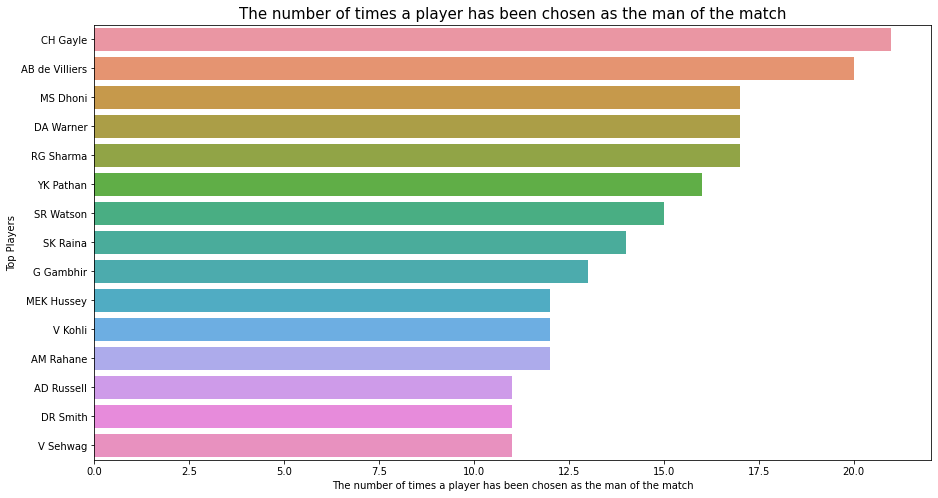

In [24]:
plt.figure(figsize=(15,8))
plt.title('The number of times a player has been chosen as the man of the match',size=15)
sns.barplot(y=man_of_the_match['Top Players'],x= man_of_the_match['The number of times a player has been chosen as the man of the match'])

### Based on this data, we can conclude that 'CH Gayle,' 'AB de Villiers,' 'MS Dhoni,' 'DA Warner,' 'RG Sharma,' SK Raina, and 'V Kohli' are the most important players in IPL history.

In [25]:
Batsman = delivery_ds.groupby('batsman')[['batsman_runs']].sum() # total no.of rus scored by each player calculated from "batsman_runs" column
Batsman = Batsman.sort_values(by='batsman_runs',ascending=False).head(15).reset_index() # Arranging in descending order and slicing the top 15 batsman
Batsman.rename(columns={'	batsman_runs':'Runs_scored'},inplace=True)
Batsman

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


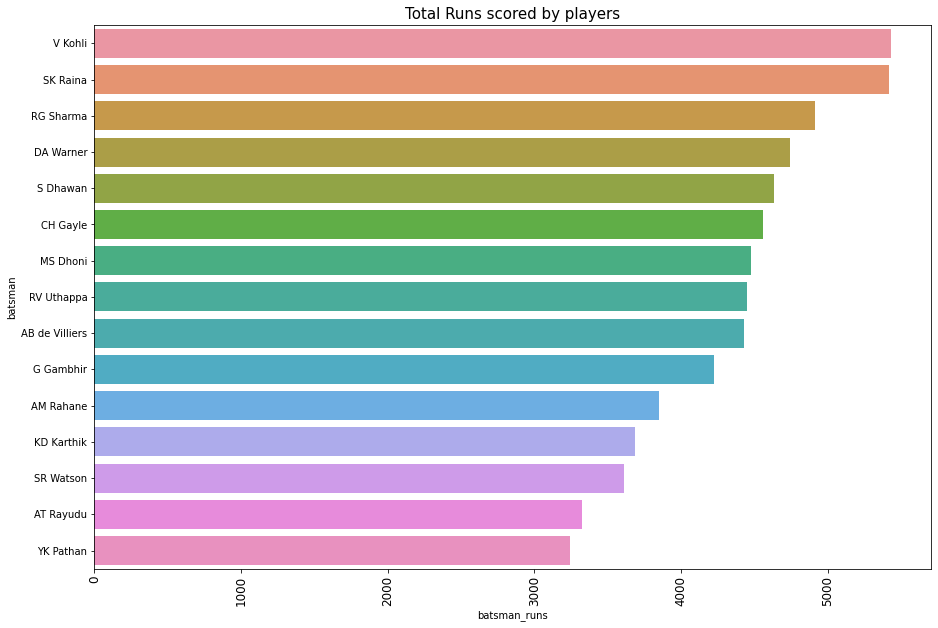

In [26]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Runs scored by players',fontsize=15)
sns.barplot(y=Batsman.batsman,x=Batsman.batsman_runs)

### According to the above chart, V Kohli, SK Raina, RG Sharma, DA Warner, S Dhawan, MS Dhoni, AB de Villiers, RV Uthappa, and CH Gayle have the most Run Scorers in IPL history.

## We can conclude from the above two bar charts that 
# Ms Dhoni, AB de Villiers, RG Sharma, and V Kohli are the most successful IPL players (2008 - 2019)

<Figure size 1296x720 with 0 Axes>

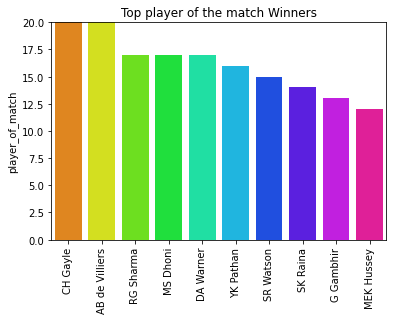

In [27]:
# we will print name of top player in IPL
plt.figure(figsize = (18,10))
top_players = match_ds.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

## The "Toss Decision" is the most important factor that contributes to a team's victory or loss.

In [28]:
match_ds['win_by']=np.where(match_ds['win_by_runs']>0,'Bat first','Bowl first')

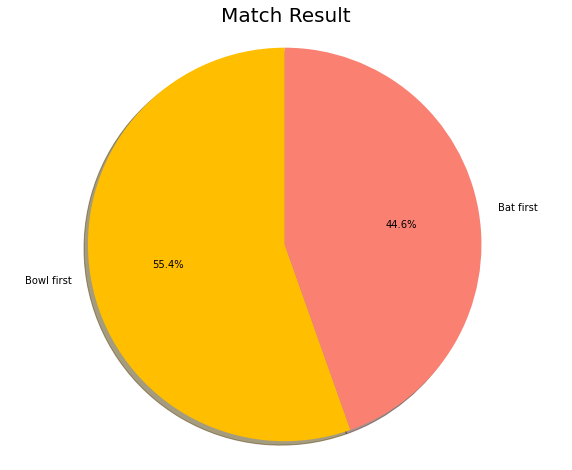

In [29]:
Win=match_ds.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

### We can deduce from the pie chart that the most of the times, teams prefers to bowl first to win the match rather than Bat first.

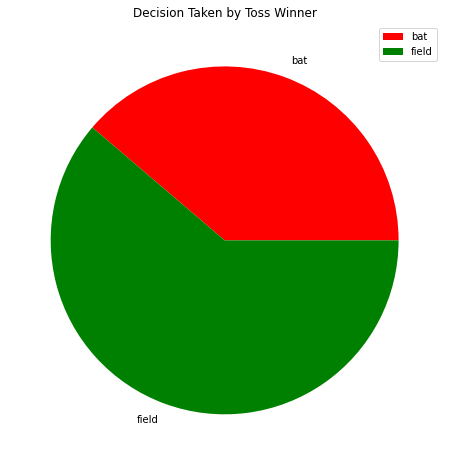

In [30]:
plt.figure(figsize=(10,8))
toss = [match_ds['toss_decision'].value_counts().bat,match_ds['toss_decision'].value_counts().field]# counting toss winner's decision
plt.pie(toss,labels=['bat','field'],colors=['red','green'])
plt.title('Decision Taken by Toss Winner')
plt.legend()

### We can deduce from the pie chart that the most of the times, teams prefers to Field rather than Bat.

### Creating a new Dataframe with toss winner and toss decision columns

In [31]:
toss_match_winner_df = match_ds[match_ds['toss_winner']==match_ds['winner']] # generating dataframe where the toss winner and match winner are same
toss_match_winner_df = toss_match_winner_df[toss_match_winner_df.result != 'tie'] # make sure the match result does not tie
toss_match_winner_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Bowl first
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Bowl first
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Bowl first
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Bat first
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,Bowl first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford,Bowl first
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,Bowl first
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,Bowl first
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,Bowl first


In [32]:
team_winning_toss_df = match_ds.groupby(['team1']).apply(lambda x:x['toss_decision'].count()).reset_index(name = 'No.of times the team won both toss and match')
team_winning_toss_df # grouping team1 from team_winning_toss_df by toss decision

,team1,No.of times the team won both toss and match
0,Chennai Super Kings,89
1,Deccan Chargers,43
2,Delhi Capitals,78
3,Gujarat Lions,14
4,Kings XI Punjab,91
5,Kochi Tuskers Kerala,7
6,Kolkata Knight Riders,83
7,Mumbai Indians,101
8,Pune Warriors,20
9,Rajasthan Royals,67


### We can deduce from the preceding table that Mumbai Indians made the better toss decision.

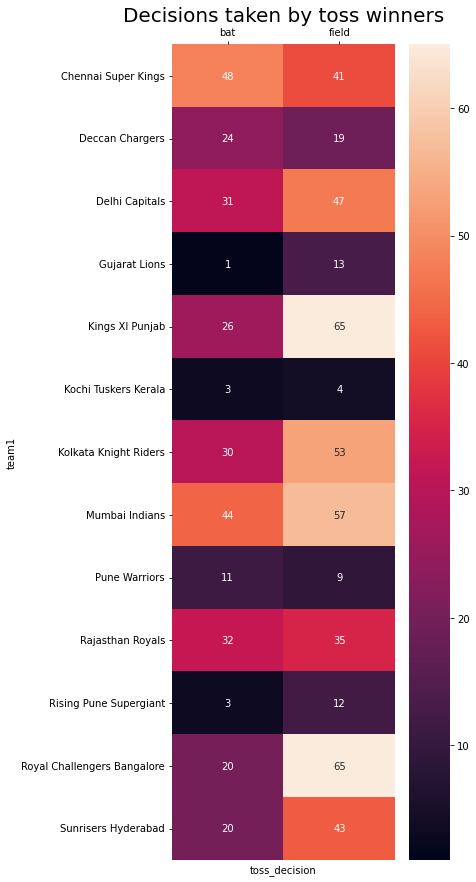

In [33]:
team_winning_toss_df = match_ds.groupby(['team1','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name = 'toss decision counts')
# slightly modifying it by grouping under toss decision
heatmap_for_data = pd.pivot_table(team_winning_toss_df, values = 'toss decision counts',
                                 index = ['team1'],
                                 columns = 'toss_decision')
# generating heatmap
fig_plt,axis = plt.subplots(1,1,figsize = (5,15))
heat_map_lead = sns.heatmap(heatmap_for_data,annot =True) 
heat_map_lead.xaxis.set_ticks_position("top") # position for ticks
axis.set_title("Decisions taken by toss winners",size = 20);

### The 'Location of the Match' is another important factor that contributes to a team's victory or loss.

In [34]:
Location = match_ds.groupby('city')[['winner']].count() #grouping no. of winner in every city  
Location=Location.sort_values(by='winner',ascending=False).reset_index()
Location.rename(columns={'city':'Location','winner':'No. of matches held in the city'},inplace=True)
Location

,Location,No. of matches held in the city
0,Mumbai,101
1,Kolkata,77
2,Delhi,73
3,Bangalore,64
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


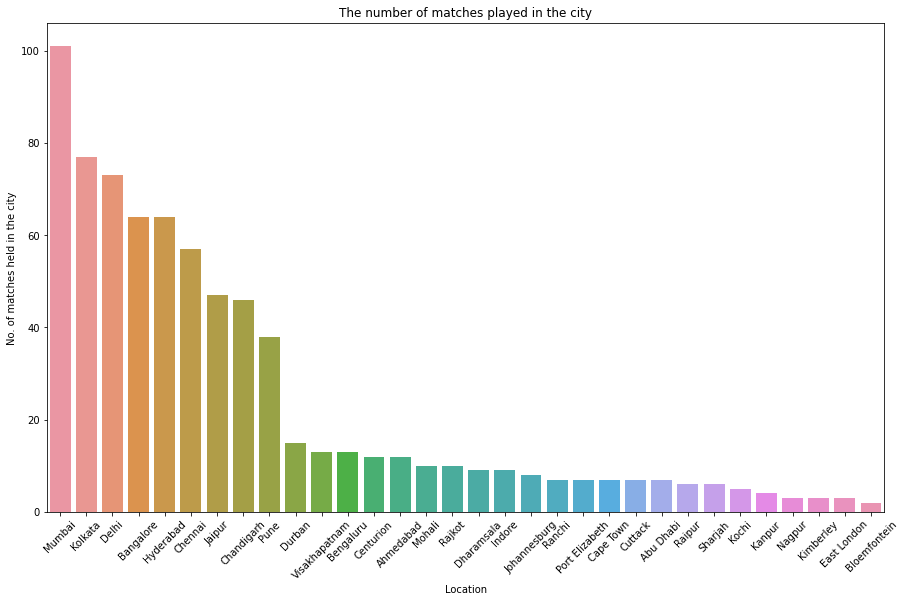

In [35]:
plt.figure(figsize=(15,9))
plt.xticks(fontsize=10,rotation=45)
plt.title("The number of matches played in the city")
sns.barplot(y = Location['No. of matches held in the city'],x=Location.Location)

## This bar graph indicates that the most important cities for IPL matches are MUMBAI, KOLKATA, DELHI, BANGALORE, HYDERABAD, and CHENNAI.Every team must prepare for a game in this major city and at a significant stadium.
<hr style="border:2px solid gray">

## Calculate the number of four hit by team

In [40]:

season_data=match_ds[['id','season','winner']]

complete_data=delivery_ds.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [41]:
# we will print numbers of fours hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


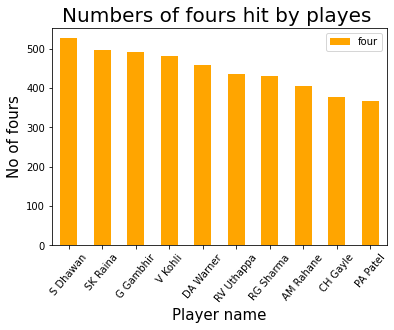

In [47]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='orange')
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

## We can conclude from the above bar charts that 
# S Dhawan, SK Raina,G Gambhir and V Kohli are hit four in most of time

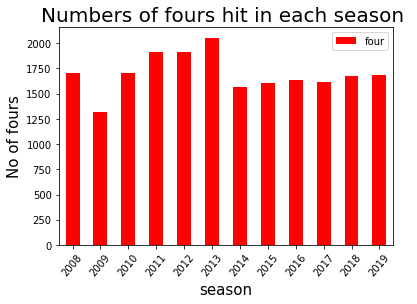

In [ ]:
# we will plot graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'red')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

## Calculate the number of six hit by team

In [ ]:
# we will print no of sixes hit by team
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


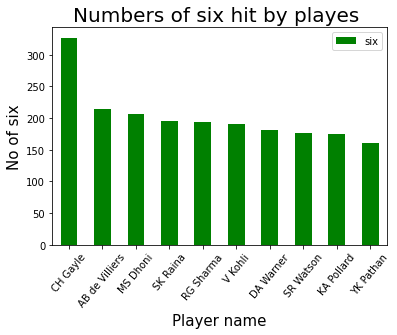

In [ ]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

## We can conclude from the above bar charts that 
# CH Gayle,AB de Villiers,SK Raina and RG Sharma are hit six in most of time

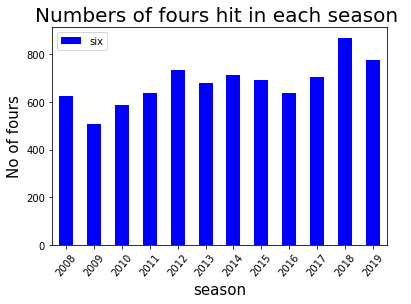

In [ ]:
# we will plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'blue')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

# **Conclusion** :

1. ## CHENNAI SUPER KINGS and MUMBAI INDIANS are the most successful teams in IPL history.
2. ## MS Dhoni, AB de Villiers, RG Sharma, and V Kohli are the most successful players in IPL history.
3. ## The Toss decision and City in which the game was played are two major factors that contibute to a team's victory and defect
4. ## I would recommend that a company to choose "MS DHONI," "V KOHLI," and "RG Sharma" to support its products because of their large fan bases .
5. ## The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.
6. ## Teams which Bowl first has higher chances of winning then the team which bat first.

7. ## The highest number of matches played by player name are SK Raina, RG Sharma.
8. ## The highest number of four hit by player is Shikar Dhawan.
9. ## The highest number of six hit by player is CH gayle. 

#**Thank You**